# Food Recommender System

##### Github Link:  https://github.com/chenliyang1024/CSCA5632
##### By: Li-Yang Chen


### Food.com Recipes and Interactions
#### Data Source: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data


In [1]:
# EDA
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import random

In [2]:
recipes = pd.read_csv('./data/recipes.csv')
users = pd.read_csv('./data/users.csv')
interactions_train = pd.read_csv('./data/interactions_train.csv')
print('Total Recipes: ', recipes.shape[0], 'Total Users: ', users.shape[0])

Total Recipes:  178265 Total Users:  25076


In [3]:
# The dataset is way too large --> sample with 5000 and 2000

In [4]:
recipes = recipes.sample(n=5000, random_state=1)
users = users.sample(n=2000, random_state=1)

In [5]:
# EDA

In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38701 to 111309
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5000 non-null   int64 
 1   i                  5000 non-null   int64 
 2   name_tokens        5000 non-null   object
 3   ingredient_tokens  5000 non-null   object
 4   steps_tokens       5000 non-null   object
 5   techniques         5000 non-null   object
 6   calorie_level      5000 non-null   int64 
 7   ingredient_ids     5000 non-null   object
dtypes: int64(3), object(5)
memory usage: 351.6+ KB


In [7]:
recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
38701,349626,92434,"[40480, 22245, 1143, 6539, 36672, 9021, 40481]","[[563, 31331, 8780], [1092, 10444, 6020], [446...","[40480, 40482, 729, 2525, 10906, 485, 43, 2232...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[7367, 5006, 3355, 2499, 7470, 6270, 7899, 579..."
161995,319324,27030,"[40480, 21044, 20826, 24610, 488, 3947, 26855,...","[[4787, 20826, 2507, 10837], [3947], [34904, 4...","[40480, 40482, 729, 2525, 10906, 485, 43, 2232...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[3022, 3597, 1675, 6654, 1168, 5180]"
55200,89174,78297,"[40480, 1301, 22090, 16296, 8619, 5339, 40481]","[[6444], [6812], [6913, 6020], [17918], [15473...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,"[6906, 2499, 1783, 2683, 335, 608, 869, 342, 607]"
153499,282939,63593,"[40480, 481, 16954, 3505, 40481]","[[1657, 17004, 40410, 745], [2104, 260, 6167, ...","[40480, 40482, 14057, 40410, 10825, 1073, 1241...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[7893, 6926, 6754, 5407, 6270, 590, 3217, 6906..."
25159,14464,38959,"[40480, 22158, 17117, 5867, 40481]","[[2911, 1019, 249, 6878], [21453], [7424, 745]...","[40480, 40482, 14046, 481, 21453, 500, 281, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[389, 5010, 4574, 6142, 6274, 5825, 171, 1511]"


In [8]:
recipes.describe()

,id,i,calorie_level
count,5000.00000,5000.000000,5000.000000
mean,210912.03200,90583.877400,0.853800
std,137721.37834,51049.784123,0.784697
min,40.00000,61.000000,0.000000
25%,91823.25000,46778.250000,0.000000
50%,192467.50000,92414.000000,1.000000
75%,314439.75000,134891.000000,1.000000
max,535230.00000,178242.000000,2.000000


In [9]:
# dropping the unwanted columns (id, name_tokens, ingredient_tokens, calorie_level)
recipes = recipes.drop(columns=['id', 'name_tokens', 'ingredient_tokens', 'calorie_level'])

In [10]:
#rename columns( i -> recipe_id, 
#                steps_tokens -> recipes_steps_tokens, 
#                techniques -> recipes_techniques, 
#                ingredient_ids -> recipes_ingredient_ids)
recipes = recipes.rename(columns={
    'i': 'recipe_id',
    'steps_tokens': 'recipes_steps_tokens',
    'techniques': 'recipes_techniques',
    'ingredient_ids': 'recipes_ingredient_ids'
})

In [11]:
recipes.head()

,recipe_id,recipes_steps_tokens,recipes_techniques,recipes_ingredient_ids
38701,92434,"[40480, 40482, 729, 2525, 10906, 485, 43, 2232...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[7367, 5006, 3355, 2499, 7470, 6270, 7899, 579..."
161995,27030,"[40480, 40482, 729, 2525, 10906, 485, 43, 2232...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3022, 3597, 1675, 6654, 1168, 5180]"
55200,78297,"[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[6906, 2499, 1783, 2683, 335, 608, 869, 342, 607]"
153499,63593,"[40480, 40482, 14057, 40410, 10825, 1073, 1241...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7893, 6926, 6754, 5407, 6270, 590, 3217, 6906..."
25159,38959,"[40480, 40482, 14046, 481, 21453, 500, 281, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 5010, 4574, 6142, 6274, 5825, 171, 1511]"


In [12]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38701 to 111309
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   recipe_id               5000 non-null   int64 
 1   recipes_steps_tokens    5000 non-null   object
 2   recipes_techniques      5000 non-null   object
 3   recipes_ingredient_ids  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB


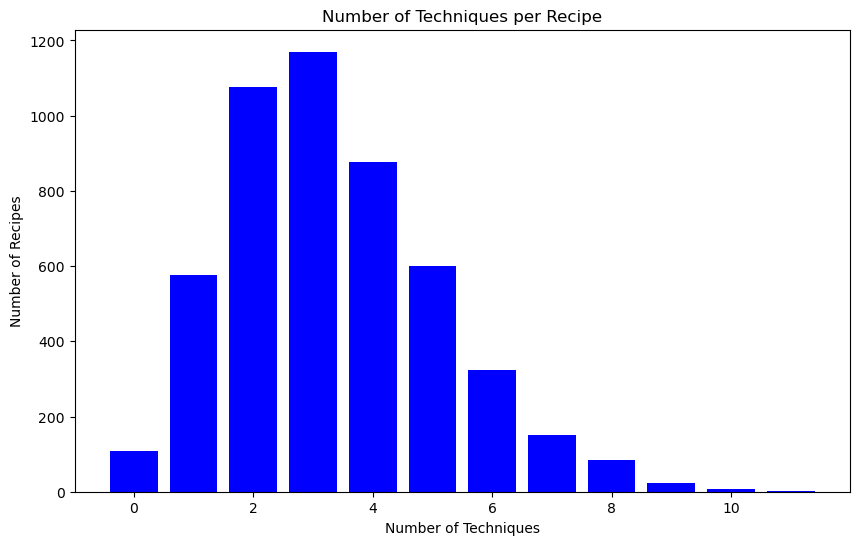

In [13]:
import json

recipes['num_techniques'] = recipes['recipes_techniques'].apply(lambda x: json.loads(x).count(1))
recipes['num_ingredients'] = recipes['recipes_ingredient_ids'].apply(len)
recipes['num_steps'] = recipes['recipes_steps_tokens'].apply(len)

# Count the occurrences of each number of items
techniques_counts = recipes['num_techniques'].value_counts().sort_index()
ingredients_counts = recipes['num_ingredients'].value_counts().sort_index()
steps_counts = recipes['num_steps'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(techniques_counts.index, techniques_counts.values, color='blue')

plt.title('Number of Techniques per Recipe')
plt.xlabel('Number of Techniques')
plt.ylabel('Number of Recipes')
plt.show()

In [14]:
techniques_counts

num_techniques
0      109
1      577
2     1075
3     1170
4      877
5      601
6      323
7      150
8       84
9       24
10       8
11       2
Name: count, dtype: int64

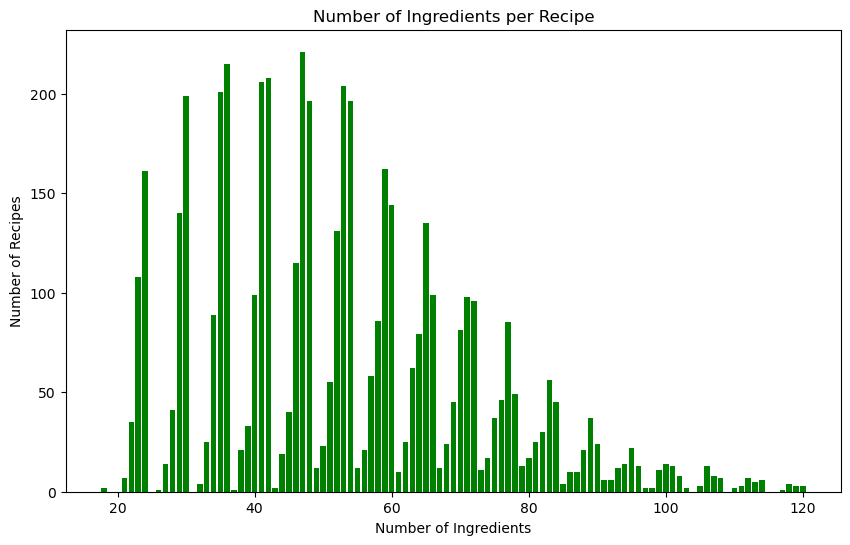

In [15]:
# Plot the number of ingredients per recipe
plt.figure(figsize=(10, 6))
plt.bar(ingredients_counts.index, ingredients_counts.values, color='green')
plt.title('Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()



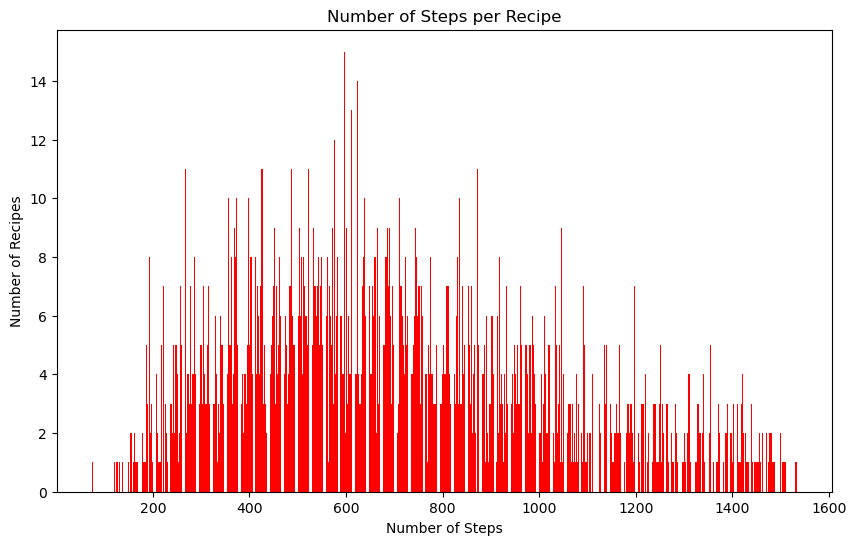

In [16]:
# Plot the number of steps per recipe
plt.figure(figsize=(10, 6))
plt.bar(steps_counts.index, steps_counts.values, color='red')
plt.title('Number of Steps per Recipe')
plt.xlabel('Number of Steps')
plt.ylabel('Number of Recipes')
plt.show()

In [17]:
recipes = recipes.drop(columns=['num_techniques', 'num_ingredients', 'num_steps'])
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38701 to 111309
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   recipe_id               5000 non-null   int64 
 1   recipes_steps_tokens    5000 non-null   object
 2   recipes_techniques      5000 non-null   object
 3   recipes_ingredient_ids  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB


In [18]:
from collections import Counter

step_counter = Counter()
technique_counter = Counter()
ingredient_counter = Counter()

# Iterate over each row in the DataFrame
for index, row in recipes.iterrows():
    # Extract the lists of step IDs, techniques, and ingredient IDs
    steps = json.loads(row['recipes_steps_tokens'])
    
    techniques = json.loads(row['recipes_techniques'])
    # Update technique_counter with counts of techniques > 0
    techniques = [1 if technique > 0 else 0 for technique in techniques]
    techniques = [i if value == 1 else 0 for i, value in enumerate(techniques)]
    techniques = list(filter(lambda x: x != 0, techniques))
    technique_counter.update(techniques)
    
    
    ingredients = json.loads(row['recipes_ingredient_ids'])
    
    # Update the counters with the respective IDs
    step_counter.update(steps)
    technique_counter.update(techniques)
    ingredient_counter.update(ingredients)
    
# Convert the counters to DataFrames
step_counts_df = pd.DataFrame.from_dict(step_counter, orient='index', columns=['count'])
step_counts_df.index.name = 'step_id'

technique_counts_df = pd.DataFrame.from_dict(technique_counter, orient='index', columns=['count'])
technique_counts_df.index.name = 'technique'

ingredient_counts_df = pd.DataFrame.from_dict(ingredient_counter, orient='index', columns=['count'])
ingredient_counts_df.index.name = 'ingredient_id'

# Sort the DataFrames by count in descending order
step_counts_df = step_counts_df.sort_values(by='count', ascending=False).head(200)
technique_counts_df = technique_counts_df.sort_values(by='count', ascending=False).head(200)
ingredient_counts_df = ingredient_counts_df.sort_values(by='count', ascending=False).head(200)

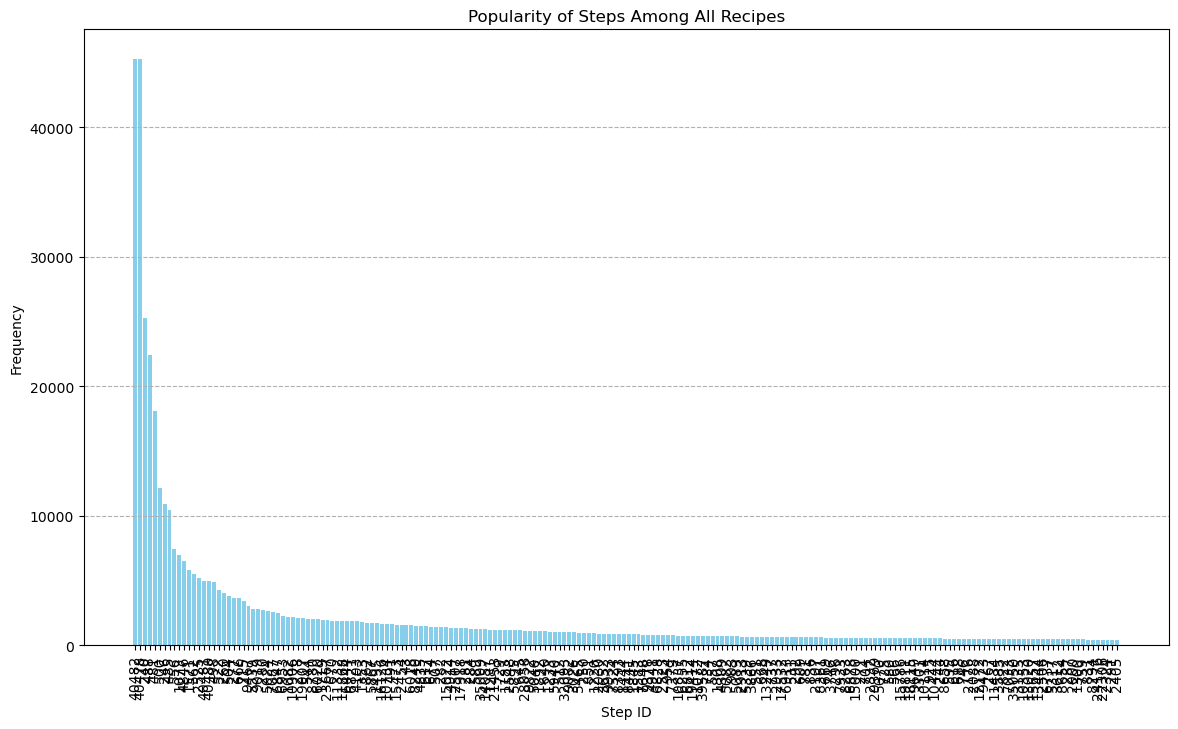

In [19]:
# Plotting each count individually
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
# Plot for steps
plt.bar(step_counts_df.index.astype(str), step_counts_df['count'], color='skyblue')
plt.xlabel('Step ID')
plt.ylabel('Frequency')
plt.title('Popularity of Steps Among All Recipes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

plt.show()

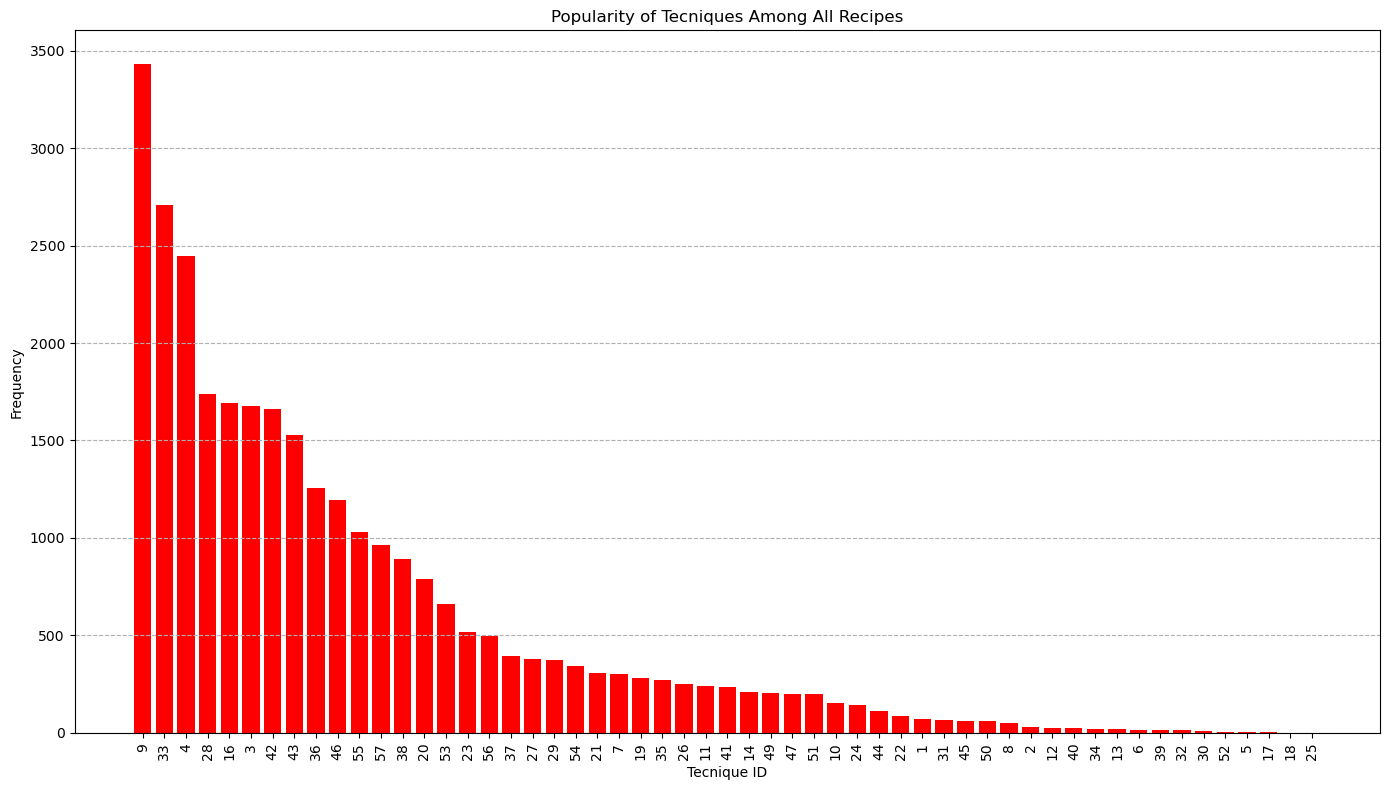

In [20]:
# Plot for technique
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
plt.bar(technique_counts_df.index.astype(str), technique_counts_df['count'], color='red')
plt.xlabel('Tecnique ID')
plt.ylabel('Frequency')
plt.title('Popularity of Tecniques Among All Recipes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

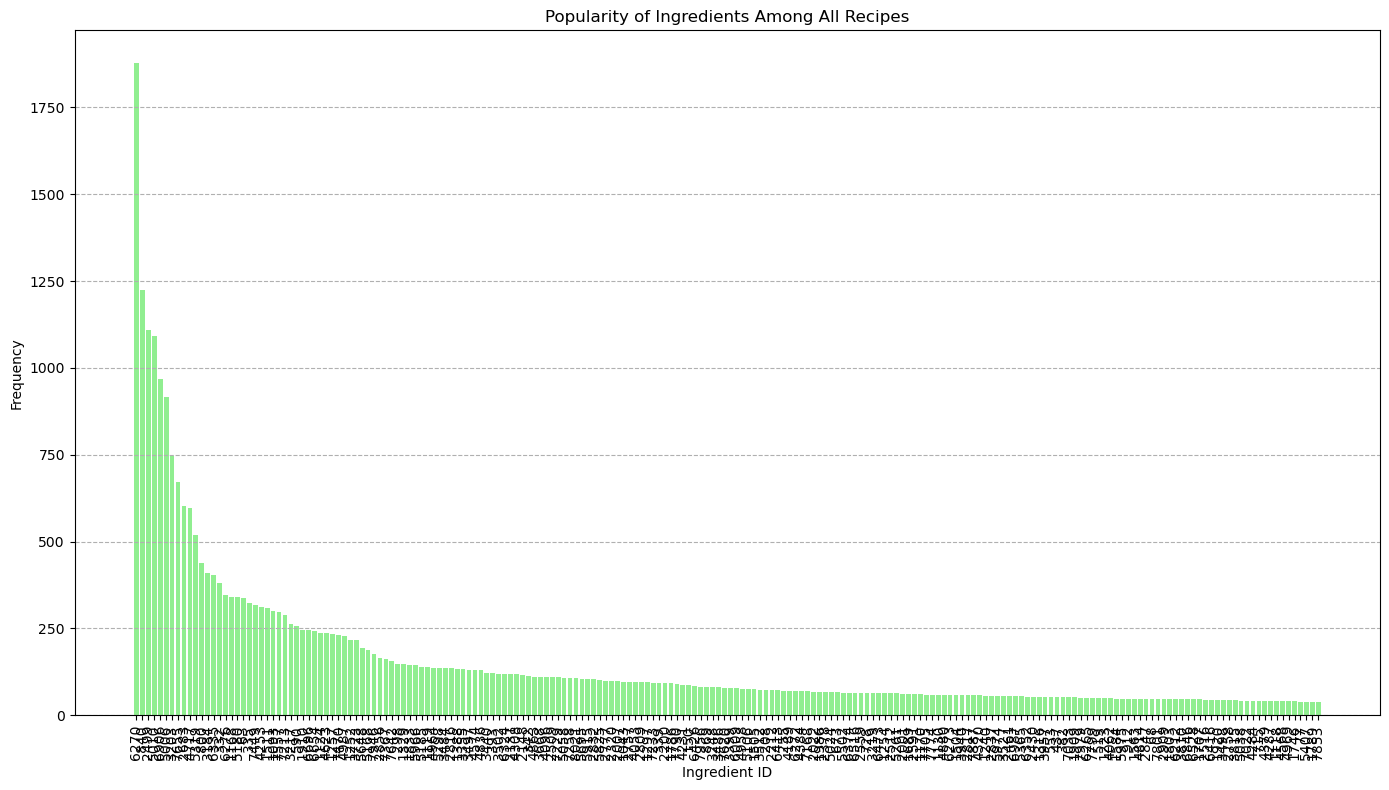

In [21]:
# Plot for ingredients
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
plt.bar(ingredient_counts_df.index.astype(str), ingredient_counts_df['count'], color='lightgreen')
plt.xlabel('Ingredient ID')
plt.ylabel('Frequency')
plt.title('Popularity of Ingredients Among All Recipes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 11812 to 5754
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   u           2000 non-null   int64 
 1   techniques  2000 non-null   object
 2   items       2000 non-null   object
 3   n_items     2000 non-null   int64 
 4   ratings     2000 non-null   object
 5   n_ratings   2000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 109.4+ KB


In [23]:
users.head()

,u,techniques,items,n_items,ratings,n_ratings
11812,11812,"[2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[10637, 9325, 79996, 135961]",4,"[5.0, 2.0, 5.0, 1.0]",4
5118,5118,"[35, 2, 0, 12, 19, 0, 0, 5, 0, 36, 2, 2, 0, 0,...","[25279, 170115, 81066, 147529, 2323, 143205, 1...",85,"[2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",85
5206,5206,"[10, 0, 0, 7, 3, 0, 0, 2, 1, 9, 0, 0, 0, 0, 1,...","[155951, 41854, 169962, 73185, 47645, 134105, ...",26,"[5.0, 5.0, 3.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, ...",26
3755,3755,"[32, 1, 0, 3, 15, 0, 0, 2, 0, 33, 11, 2, 0, 0,...","[159123, 48236, 88443, 90556, 167168, 73640, 1...",79,"[4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, ...",79
5444,5444,"[5, 0, 0, 2, 2, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, ...","[170583, 125955, 129711, 39011, 120123, 27799,...",12,"[5.0, 4.0, 5.0, 5.0, 5.0, 0.0, 5.0, 5.0, 4.0, ...",12


In [24]:
users.describe()

,u,n_items,n_ratings
count,2000.000000,2000.000000,2000.000000
mean,12474.831500,32.393000,32.393000
std,7302.907142,159.053263,159.053263
min,2.000000,2.000000,2.000000
25%,6051.000000,3.000000,3.000000
50%,12542.500000,6.000000,6.000000
75%,18686.750000,16.000000,16.000000
max,25061.000000,4581.000000,4581.000000


In [25]:
# dropping the unwanted columns (items, n_items, ratings, n_ratings)
users = users.drop(columns=['items', 'n_items', 'ratings', 'n_ratings'])

In [26]:
# rename columns(u -> user_id)
users = users.rename(columns={
    'u': 'user_id',
    'techniques':'user_techniques'
})

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 11812 to 5754
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          2000 non-null   int64 
 1   user_techniques  2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


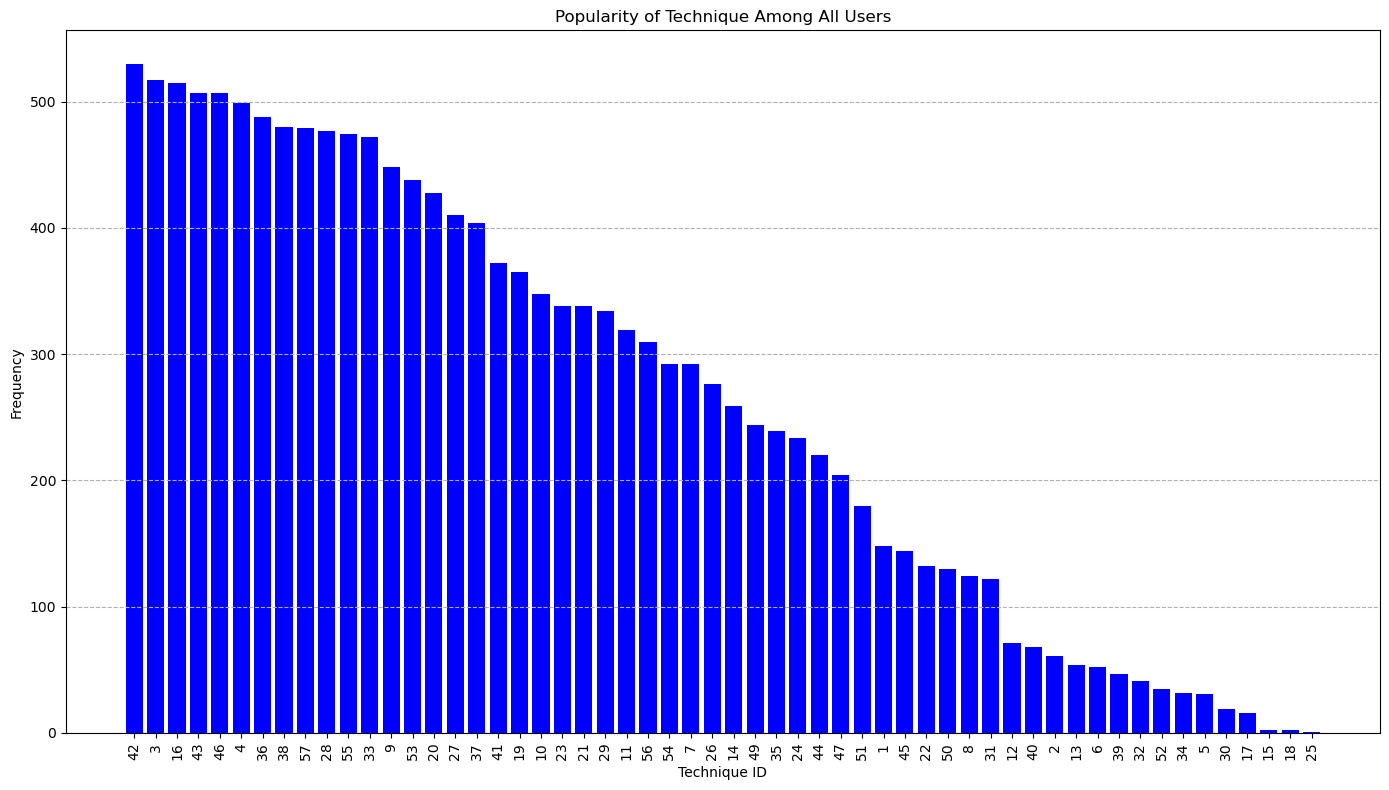

In [28]:
technique_counter = Counter()
for index, row in users.iterrows():
    # Convert user_techniques to list of integers
    user_techniques = json.loads(row['user_techniques']) 
    # Update technique_counter with counts of techniques > 0
    indices_list = [1 if technique > 0 else 0 for technique in user_techniques]
    indices_list = [i if value == 1 else 0 for i, value in enumerate(user_techniques)]
    indices_list = list(filter(lambda x: x != 0, indices_list))
    technique_counter.update(indices_list)

# Convert the technique_counter to a DataFrame
technique_counts_df = pd.DataFrame.from_dict(technique_counter, orient='index', columns=['count'])
technique_counts_df.index.name = 'technique_id'

# Sort the DataFrame by count in descending order (optional)
technique_counts_df = technique_counts_df.sort_values(by='count', ascending=False)

# Plotting the technique counts
plt.figure(figsize=(14, 8))
plt.bar(technique_counts_df.index.astype(str), technique_counts_df['count'], color='blue')
plt.xlabel('Technique ID')
plt.ylabel('Frequency')
plt.title('Popularity of Technique Among All Users')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [29]:
interactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   date       698901 non-null  object 
 3   rating     698901 non-null  float64
 4   u          698901 non-null  int64  
 5   i          698901 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ MB


In [30]:
interactions_train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [31]:
interactions_train.describe()

,user_id,recipe_id,rating,u,i
count,6.989010e+05,698901.000000,698901.000000,698901.000000,698901.000000
mean,1.247694e+07,156173.409849,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,5.000000,5919.000000,131731.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000


In [32]:
# dropping the unwanted columns (user_id, recipe_id, date)
interactions_train = interactions_train.drop(columns=['user_id', 'recipe_id', 'date'])

In [33]:
# rename columns(u -> user_id, i -> recipe_id)
interactions_train = interactions_train.rename(columns={
    'u': 'user_id',
    'i': 'recipe_id'
})

In [34]:
interactions_train.describe()

,rating,user_id,recipe_id
count,698901.000000,698901.000000,698901.000000
mean,4.574090,4249.330271,87519.330993
std,0.959022,5522.602821,51290.370370
min,0.000000,0.000000,0.000000
25%,4.000000,455.000000,42988.000000
50%,5.000000,1737.000000,87424.000000
75%,5.000000,5919.000000,131731.000000
max,5.000000,25075.000000,178262.000000


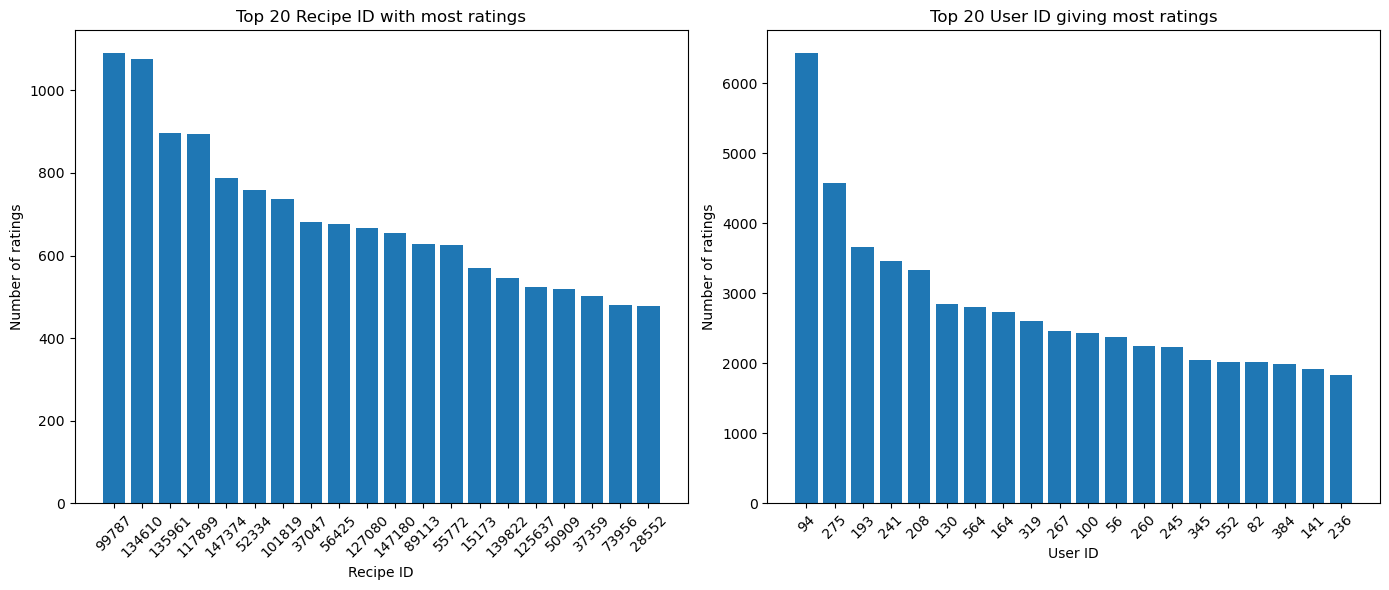

In [36]:
# interactions_train.drop()
# Top 20 recipe_id with the most ratings
top_recipe_ratings = interactions_train['recipe_id'].value_counts().head(20)

# Top 20 user_id giving the most ratings
top_user_ratings = interactions_train['user_id'].value_counts().head(20)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 20 recipe_id with most ratings
ax1.bar(top_recipe_ratings.index.astype(str), top_recipe_ratings.values)
ax1.set_title('Top 20 Recipe ID with most ratings')
ax1.set_xlabel('Recipe ID')
ax1.set_ylabel('Number of ratings')
ax1.tick_params(axis='x', rotation=45)

# Plot for top 20 user_id giving most ratings
ax2.bar(top_user_ratings.index.astype(str), top_user_ratings.values)
ax2.set_title('Top 20 User ID giving most ratings')
ax2.set_xlabel('User ID')
ax2.set_ylabel('Number of ratings')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [37]:
interactions_train['recipe_id'].value_counts().describe()

count    160901.000000
mean          4.343671
std          13.421461
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1091.000000
Name: count, dtype: float64

In [38]:
interactions_train['user_id'].value_counts().describe()

count    25076.000000
mean        27.871311
std        122.729039
min          2.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       6437.000000
Name: count, dtype: float64

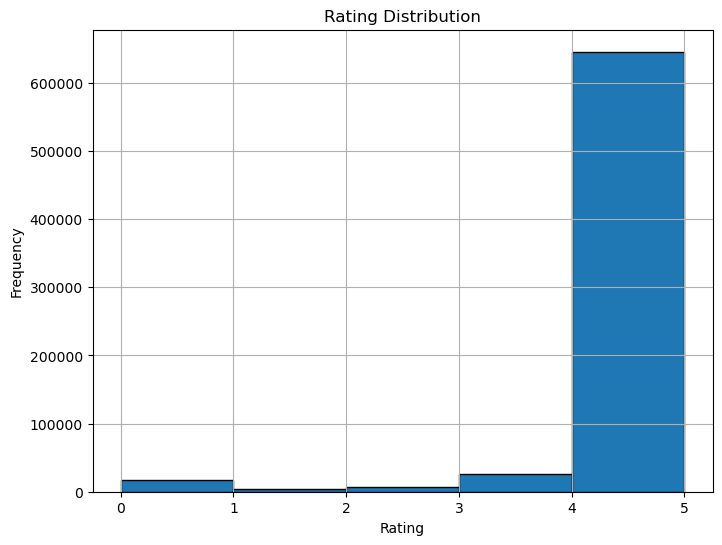

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(interactions_train['rating'], bins=5, edgecolor='black')  # Adjust number of bins as needed
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [40]:
# receipe_feature_matrix

In [41]:

target_step_ids = list(step_counts_df.index)
target_ingredients_ids = list(ingredient_counts_df.index)
target_technique_ids = list(technique_counts_df.index)


In [42]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 38701 to 111309
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   recipe_id               5000 non-null   int64 
 1   recipes_steps_tokens    5000 non-null   object
 2   recipes_techniques      5000 non-null   object
 3   recipes_ingredient_ids  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB


In [43]:
recipes_feature_matrix_steps = pd.DataFrame(0, index=recipes.index, columns=target_step_ids)
recipes_feature_matrix_ingredients = pd.DataFrame(0, index=recipes.index, columns=target_ingredients_ids)
recipes_feature_matrix_techniques = pd.DataFrame(0, index=recipes.index, columns=target_technique_ids)

In [44]:
for index, row in recipes.iterrows():
    for step in json.loads(row['recipes_steps_tokens']):
        if(step in target_step_ids):
            recipes_feature_matrix_steps.loc[index, step] = 1
    for ing in json.loads(row['recipes_ingredient_ids']):
        if(ing in target_ingredients_ids):
            recipes_feature_matrix_ingredients.loc[index, ing] = 1
    for tech_index, tech in enumerate(json.loads(row['recipes_techniques'])):
        if(tech == 1 and (tech_index in target_technique_ids)):
            recipes_feature_matrix_techniques.loc[index, tech_index] = 1

In [45]:
recipes_feature_matrix_steps

,40482,40478,240,488,481,500,246,485,556,1073,...,2000,1300,759,831,8294,24176,22306,2324,291,2405
38701,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
161995,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
55200,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
153499,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
25159,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81412,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
16179,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
95944,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
150725,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
recipes_feature_matrix_ingredients

,6270,840,2499,5010,6906,5006,3203,7655,2683,4717,...,4379,4287,1118,4568,4969,1746,77,5407,1789,7853
38701,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55200,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
153499,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
25159,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81412,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16179,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
150725,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
recipes_feature_matrix_techniques

,42,3,16,43,46,4,36,38,57,28,...,39,32,52,34,5,30,17,15,18,25
38701,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
161995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55200,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153499,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25159,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81412,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16179,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95944,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150725,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# conent based

In [49]:
# receipe_receipe_similarity (Jaccard)

In [50]:
epsilon = 1e-9       
recipes_feature_matrix_steps_matrix = recipes_feature_matrix_steps.values
intersection = recipes_feature_matrix_steps_matrix @ recipes_feature_matrix_steps_matrix.T
# sum to 1d
feature_count = recipes_feature_matrix_steps_matrix.sum(axis=1).flatten() 
# union = norm a + norm b - intersection
union = feature_count[:, None] + feature_count[None, :] - intersection
recipes_feature_matrix_steps_similarity = intersection / (union + epsilon)
np.fill_diagonal(recipes_feature_matrix_steps_similarity, 1.0)
recipes_feature_matrix_steps_similarity

array([[1.        , 0.30769231, 0.38888889, ..., 0.21505376, 0.27906977,
        0.27272727],
       [0.30769231, 1.        , 0.46153846, ..., 0.28985507, 0.28358209,
        0.27586207],
       [0.38888889, 0.46153846, 1.        , ..., 0.29850746, 0.29230769,
        0.18032787],
       ...,
       [0.21505376, 0.28985507, 0.29850746, ..., 1.        , 0.32876712,
        0.34920635],
       [0.27906977, 0.28358209, 0.29230769, ..., 0.32876712, 1.        ,
        0.26153846],
       [0.27272727, 0.27586207, 0.18032787, ..., 0.34920635, 0.26153846,
        1.        ]])

In [51]:
epsilon = 1e-9       
recipes_feature_matrix_ingredients_matrix = recipes_feature_matrix_ingredients.values
intersection = recipes_feature_matrix_ingredients_matrix @ recipes_feature_matrix_ingredients_matrix.T
# sum to 1d
feature_count = recipes_feature_matrix_ingredients_matrix.sum(axis=1).flatten() 
# union = norm a + norm b - intersection
union = feature_count[:, None] + feature_count[None, :] - intersection
recipes_feature_matrix_ingredients_similarity = intersection / (union + epsilon)
np.fill_diagonal(recipes_feature_matrix_ingredients_similarity, 1.0)
recipes_feature_matrix_ingredients_similarity

array([[1.        , 0.        , 0.07692308, ..., 0.        , 0.09090909,
        0.08333333],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.        , ..., 0.        , 1.        ,
        0.28571429],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.28571429,
        1.        ]])

In [52]:
epsilon = 1e-9       
recipes_feature_matrix_techniques_matrix = recipes_feature_matrix_techniques.values
intersection = recipes_feature_matrix_techniques_matrix @ recipes_feature_matrix_techniques_matrix.T
# sum to 1d
feature_count = recipes_feature_matrix_techniques_matrix.sum(axis=1).flatten() 
# union = norm a + norm b - intersection
union = feature_count[:, None] + feature_count[None, :] - intersection
recipes_feature_matrix_techniques_similarity = intersection / (union + epsilon)
np.fill_diagonal(recipes_feature_matrix_techniques_similarity, 1.0)
recipes_feature_matrix_techniques_similarity

array([[1.        , 0.        , 0.16666667, ..., 0.        , 0.14285714,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 1.        , ..., 0.33333333, 0.28571429,
        0.        ],
       ...,
       [0.        , 0.        , 0.33333333, ..., 1.        , 0.28571429,
        0.        ],
       [0.14285714, 0.        , 0.28571429, ..., 0.28571429, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [53]:
# user_recipes_matrix
user_ids = list(users['user_id'])
recipes_ids = list(recipes['recipe_id'])

user_recipes_matrix = pd.DataFrame(0, index=user_ids, columns=recipes_ids)

for index, row in interactions_train.iterrows():
    user_id = int(row['user_id'])
    recipe_id = int(row['recipe_id'])
    rating = row['rating']
    if((user_id in user_ids) and (recipe_id in recipes_ids)):
        user_recipes_matrix.loc[user_id, recipe_id] = rating

In [54]:
user_recipes_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 11812 to 5754
Columns: 5000 entries, 92434 to 62516
dtypes: int64(5000)
memory usage: 76.4 MB


In [55]:
user_recipes_matrix.shape

(2000, 5000)

In [56]:
# prediction using recipes_feature_matrix_steps_similarity

In [57]:
recipes_feature_matrix_steps_similarity.shape

(5000, 5000)

In [58]:
epsilon = 1e-9       
def predict_from_similarity(userID, recipesID, similarityMatrix):
    # get index of user from users
    userIndex = user_ids.index(userID)
    # get index of recipe from recipes
    recipeIndex = recipes_ids.index(recipesID)

    one_user_rating = user_recipes_matrix.values[userIndex, :]
    one_recipes_sim_scores = similarityMatrix[recipeIndex, :] 
    
    valid_ratings = np.dot(one_recipes_sim_scores, one_user_rating > 0)
    
    if(one_user_rating[recipeIndex] != 0):
        return one_user_rating[recipeIndex]
    else:
        return np.dot(one_user_rating, one_recipes_sim_scores) / (valid_ratings + epsilon)

In [59]:
predict_from_similarity(5206, 27030, recipes_feature_matrix_steps_similarity)

4.999999978571429

In [60]:
predict_from_similarity(5206, 27030, recipes_feature_matrix_ingredients_similarity)

0.0

In [61]:
predict_from_similarity(5206, 27030, recipes_feature_matrix_techniques_similarity)

0.0

In [62]:
randomUserID = random.choice(user_ids) 
randomRecipeID = UserID = random.choice(recipes_ids) 

print(predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_steps_similarity))
print(predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_ingredients_similarity))
print(predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_techniques_similarity))

0.0
0.0
0.0


In [63]:
interactions_test = pd.read_csv('./data/interactions_test.csv')
# dropping the unwanted columns (user_id, recipe_id, date)
interactions_test = interactions_test.drop(columns=['user_id', 'recipe_id', 'date'])
# rename columns(u -> user_id, i -> recipe_id)
interactions_test = interactions_train.rename(columns={
    'u': 'user_id',
    'i': 'recipe_id'
})

interactions_test.describe()

,rating,user_id,recipe_id
count,698901.000000,698901.000000,698901.000000
mean,4.574090,4249.330271,87519.330993
std,0.959022,5522.602821,51290.370370
min,0.000000,0.000000,0.000000
25%,4.000000,455.000000,42988.000000
50%,5.000000,1737.000000,87424.000000
75%,5.000000,5919.000000,131731.000000
max,5.000000,25075.000000,178262.000000


In [64]:
from sklearn.metrics import confusion_matrix

y_true = []
y_pred_steps = []
y_pred_ingredients = []
y_pred_techniques = []

for index, row in interactions_test.iterrows():
    user_id = int(row['user_id'])
    recipe_id = int(row['recipe_id'])
    rating = row['rating']
    
    
    if(user_id in user_ids and recipe_id in recipes_ids):
        y_true.append(rating)
        y_pred_steps.append(
            predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_steps_similarity))
        y_pred_ingredients.append(
            predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_ingredients_similarity))
        y_pred_techniques.append(
            predict_from_similarity(randomUserID, randomRecipeID, recipes_feature_matrix_techniques_similarity))


In [65]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(np.array(y_true), np.array(y_pred_steps))))
print(np.sqrt(mean_squared_error(np.array(y_true), np.array(y_pred_ingredients))))
print(np.sqrt(mean_squared_error(np.array(y_true), np.array(y_pred_techniques))))

4.729120177863505
4.729120177863505
4.729120177863505


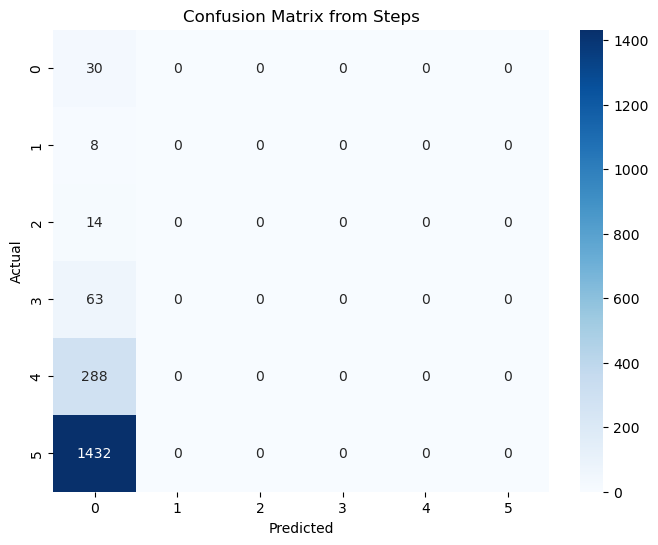

In [66]:
y_pred_steps_ = [round(num) for num in y_pred_steps]

cm_steps = confusion_matrix(y_true, y_pred_steps_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_steps, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix from Steps')
plt.show()

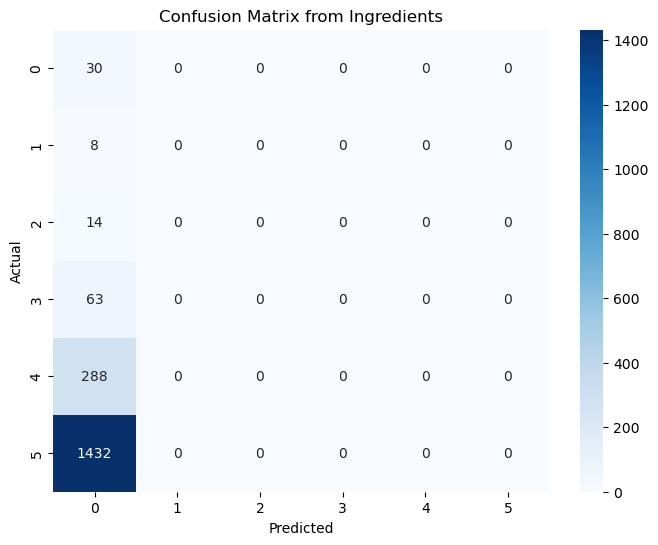

In [67]:
y_pred_ingredients_ = [round(num) for num in y_pred_ingredients]

cm_ingredients = confusion_matrix(y_true, y_pred_ingredients_, labels=[0, 1, 2, 3, 4, 5])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ingredients, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix from Ingredients')
plt.show()

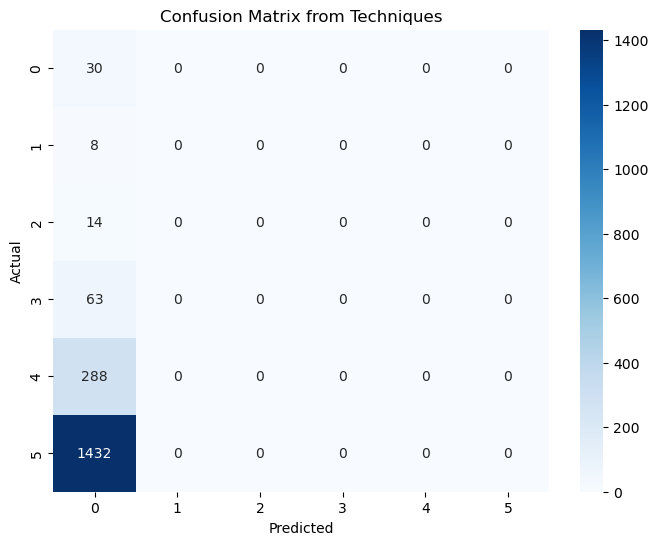

In [68]:
y_pred_techniques_ = [round(num) for num in y_pred_techniques]
cm_techniques = confusion_matrix(y_true, y_pred_techniques_, labels=[0, 1, 2, 3, 4, 5])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_techniques, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix from Techniques')
plt.show()

In [69]:
pd_predictions = pd.DataFrame({
    'y_true': y_true, 
    'y_pred_techniques': y_pred_techniques_,
    'y_pred_ingredients':y_pred_ingredients_,
    'y_pred_steps':y_pred_steps_
})

In [70]:
pd_predictions['y_pred_avg'] = (
    pd_predictions[['y_pred_techniques', 'y_pred_ingredients', 'y_pred_steps']].mean(axis=1))

In [71]:
pd_predictions

,y_true,y_pred_techniques,y_pred_ingredients,y_pred_steps,y_pred_avg
0,5.0,0,0,0,0.0
1,5.0,0,0,0,0.0
2,5.0,0,0,0,0.0
3,5.0,0,0,0,0.0
4,5.0,0,0,0,0.0
...,...,...,...,...,...
1830,4.0,0,0,0,0.0
1831,5.0,0,0,0,0.0
1832,5.0,0,0,0,0.0
1833,5.0,0,0,0,0.0


In [72]:

df = pd_predictions

# Define a scoring function (example: accuracy)
def compute_score(weights, df):
    weighted_predict = (weights[0] * df['y_pred_techniques'] + 
                        weights[1] * df['y_pred_ingredients'] + 
                        weights[2] * df['y_pred_steps'])
    weighted_predict = np.round(weighted_predict).astype(int)  # Assuming predictions are integers
    score = np.mean(weighted_predict == df['y_true'])
    return score

# Example of using grid search to find optimal weights (you can use more advanced methods as needed)
best_score = 0.0
best_weights = None

# Try different combinations of weights (example: simple grid search)
for w1 in np.linspace(0, 1, 11):
    for w2 in np.linspace(0, 1 - w1, 11):
        w3 = 1 - w1 - w2
        weights = [w1, w2, w3]
        score = compute_score(weights, df)
        if score > best_score:
            best_score = score
            best_weights = weights

print("Best weights:", best_weights)
print("Best score:", best_score)

# Once you have the best weights, compute the weighted predictions
df['weighted_predict'] = (best_weights[0] * df['y_pred_techniques'] +
                          best_weights[1] * df['y_pred_ingredients'] +
                          best_weights[2] * df['y_pred_steps'])

# Round and convert to integer (if predictions are integers)
df['weighted_predict'] = np.round(df['weighted_predict']).astype(int)

# Display the DataFrame with the new column
df.head()

Best weights: [0.0, 0.0, 1.0]
Best score: 0.01634877384196185


,y_true,y_pred_techniques,y_pred_ingredients,y_pred_steps,y_pred_avg,weighted_predict
0,5.0,0,0,0,0.0,0
1,5.0,0,0,0,0.0,0
2,5.0,0,0,0,0.0,0
3,5.0,0,0,0,0.0,0
4,5.0,0,0,0,0.0,0


##### FAILED 

## Change a technique, merge all features and pick rows with more than 75% of the features for training 

In [73]:
recipes = pd.read_csv('./data/recipes.csv')
users = pd.read_csv('./data/users.csv')
interactions_train = pd.read_csv('./data/interactions_train.csv')

print('Total Recipes: ', recipes.shape[0], 'Total Users: ', users.shape[0])

Total Recipes:  178265 Total Users:  25076


In [74]:
# dropping the unwanted columns (id, name_tokens, ingredient_tokens, calorie_level)
recipes = recipes.drop(columns=['id', 'name_tokens', 'ingredient_tokens', 'calorie_level'])
#rename columns( i -> recipe_id, 
#                steps_tokens -> recipes_steps_tokens, 
#                techniques -> recipes_techniques, 
#                ingredient_ids -> recipes_ingredient_ids)
recipes = recipes.rename(columns={
    'i': 'recipe_id',
    'steps_tokens': 'recipes_steps_tokens',
    'techniques': 'recipes_techniques',
    'ingredient_ids': 'recipes_ingredient_ids'
})

In [75]:
# dropping the unwanted columns (items, n_items, ratings, n_ratings)
users = users.drop(columns=['items', 'n_items', 'ratings', 'n_ratings'])
# rename columns(u -> user_id)
users = users.rename(columns={
    'u': 'user_id',
    'techniques':'user_techniques'
})

In [76]:
# dropping the unwanted columns (user_id, recipe_id, date)
interactions_train = interactions_train.drop(columns=['user_id', 'recipe_id', 'date'])
# rename columns(u -> user_id, i -> recipe_id)
interactions_train = interactions_train.rename(columns={
    'u': 'user_id',
    'i': 'recipe_id'
})

In [77]:
target_step_ids = list(step_counts_df.index)
target_ingredients_ids = list(ingredient_counts_df.index)
target_technique_ids = list(technique_counts_df.index)

recipes_feature_matrix_steps = pd.DataFrame(0, index=recipes.index, columns=target_step_ids)
recipes_feature_matrix_ingredients = pd.DataFrame(0, index=recipes.index, columns=target_ingredients_ids)
recipes_feature_matrix_techniques = pd.DataFrame(0, index=recipes.index, columns=target_technique_ids)

In [78]:
for index, row in recipes.iterrows():
    for step in json.loads(row['recipes_steps_tokens']):
        if(step in target_step_ids):
            recipes_feature_matrix_steps.loc[index, step] = 1
    for ing in json.loads(row['recipes_ingredient_ids']):
        if(ing in target_ingredients_ids):
            recipes_feature_matrix_ingredients.loc[index, ing] = 1
    for tech_index, tech in enumerate(json.loads(row['recipes_techniques'])):
        if(tech == 1 and (tech_index in target_technique_ids)):
            recipes_feature_matrix_techniques.loc[index, tech_index] = 1

In [79]:
recipes_feature_matrix_steps
new_columns = {col: 'step_' + str(col) for col in recipes_feature_matrix_steps.columns}
recipes_feature_matrix_steps = recipes_feature_matrix_steps.rename(columns=new_columns)

In [80]:
recipes_feature_matrix_ingredients
new_columns = {col: 'ingredient_' + str(col) for col in recipes_feature_matrix_ingredients.columns}
recipes_feature_matrix_ingredients = recipes_feature_matrix_ingredients.rename(columns=new_columns)

In [81]:
recipes_feature_matrix_techniques
new_columns = {col: 'tech_' + str(col) for col in recipes_feature_matrix_techniques.columns}
recipes_feature_matrix_techniques = recipes_feature_matrix_techniques.rename(columns=new_columns)

In [82]:
recipes_feature_matrix = pd.concat(
    [recipes_feature_matrix_steps, recipes_feature_matrix_ingredients, recipes_feature_matrix_techniques], axis=1)

In [83]:
recipes_feature_matrix

,step_40482,step_40478,step_240,step_488,step_481,step_500,step_246,step_485,step_556,step_1073,...,tech_39,tech_32,tech_52,tech_34,tech_5,tech_30,tech_17,tech_15,tech_18,tech_25
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
178261,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
178262,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
178263,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
recipes_feature_matrix['sum_of_features'] = recipes_feature_matrix.sum(axis=1)
recipes_feature_matrix

,step_40482,step_40478,step_240,step_488,step_481,step_500,step_246,step_485,step_556,step_1073,...,tech_32,tech_52,tech_34,tech_5,tech_30,tech_17,tech_15,tech_18,tech_25,sum_of_features
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,37
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,70
2,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,60
3,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,51
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,52
178261,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,57
178262,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,70
178263,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,90


In [85]:
recipes_feature_matrix.describe()

,step_40482,step_40478,step_240,step_488,step_481,step_500,step_246,step_485,step_556,step_1073,...,tech_32,tech_52,tech_34,tech_5,tech_30,tech_17,tech_15,tech_18,tech_25,sum_of_features
count,178265.0,178265.0,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,...,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000,178265.000000
mean,1.0,1.0,0.904131,0.955364,0.670822,0.904866,0.794906,0.801133,0.722559,0.716658,...,0.001846,0.000802,0.001245,0.000639,0.000853,0.000359,0.000034,0.000180,0.000062,53.014989
std,0.0,0.0,0.294412,0.206503,0.469916,0.293400,0.403771,0.399149,0.447737,0.450622,...,0.042921,0.028311,0.035267,0.025280,0.029188,0.018944,0.005801,0.013397,0.007855,16.170221
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000
50%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
75%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000


In [86]:
recipes_feature_matrix_final = recipes_feature_matrix[recipes_feature_matrix['sum_of_features'] >= 65]
recipes_feature_matrix_final

,step_40482,step_40478,step_240,step_488,step_481,step_500,step_246,step_485,step_556,step_1073,...,tech_32,tech_52,tech_34,tech_5,tech_30,tech_17,tech_15,tech_18,tech_25,sum_of_features
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,70
8,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,65
11,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,70
17,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,78
18,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178250,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,73
178253,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,82
178259,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,72
178262,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,70


In [87]:
recipes_feature_matrix_final = recipes_feature_matrix_final.drop(columns=['sum_of_features'])

In [88]:
recipes_feature_matrix_final

,step_40482,step_40478,step_240,step_488,step_481,step_500,step_246,step_485,step_556,step_1073,...,tech_39,tech_32,tech_52,tech_34,tech_5,tech_30,tech_17,tech_15,tech_18,tech_25
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
17,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178250,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
178253,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
178259,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
178262,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
epsilon = 1e-9       
recipes_feature_matrix_matrix = recipes_feature_matrix_final.values
intersection = recipes_feature_matrix_matrix @ recipes_feature_matrix_matrix.T
# sum to 1d
feature_count = recipes_feature_matrix_matrix.sum(axis=1).flatten() 
# union = norm a + norm b - intersection
union = feature_count[:, None] + feature_count[None, :] - intersection
recipes_feature_matrix_similarity = intersection / (union + epsilon)
np.fill_diagonal(recipes_feature_matrix_similarity, 1.0)
recipes_feature_matrix_similarity

array([[1.        , 0.36363636, 0.20689655, ..., 0.3271028 , 0.2962963 ,
        0.20300752],
       [0.36363636, 1.        , 0.15384615, ..., 0.33009709, 0.28571429,
        0.16541353],
       [0.20689655, 0.15384615, 1.        , ..., 0.22413793, 0.2173913 ,
        0.28      ],
       ...,
       [0.3271028 , 0.33009709, 0.22413793, ..., 1.        , 0.35238095,
        0.2       ],
       [0.2962963 , 0.28571429, 0.2173913 , ..., 0.35238095, 1.        ,
        0.26984127],
       [0.20300752, 0.16541353, 0.28      , ..., 0.2       , 0.26984127,
        1.        ]])

In [90]:
recipes_feature_matrix_similarity.shape

(44476, 44476)

In [91]:
# user_recipes_matrix
user_ids = list(users['user_id'])
recipes_ids = list(recipes_feature_matrix_final.index)

user_recipes_matrix_final = pd.DataFrame(0, index=user_ids, columns=recipes_ids)

for index, row in interactions_train.iterrows():
    user_id = int(row['user_id'])
    recipe_id = int(row['recipe_id'])
    rating = row['rating']
    if((user_id in user_ids) and (recipe_id in recipes_ids)):
        user_recipes_matrix_final.loc[user_id, recipe_id] = rating

In [92]:
user_recipes_matrix_final

,1,8,11,17,18,20,21,22,24,30,...,178238,178239,178243,178247,178249,178250,178253,178259,178262,178263
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
user_recipes_matrix_final.describe()

,1,8,11,17,18,20,21,22,24,30,...,178238,178239,178243,178247,178249,178250,178253,178259,178262,178263
count,25076.00000,25076.000000,25076.000000,25076.00000,25076.000000,25076.000000,25076.000000,25076.000000,25076.000000,25076.000000,...,25076.000000,25076.000000,25076.0,25076.0,25076.0,25076.0,25076.0,25076.0,25076.000000,25076.0
mean,0.00016,0.000199,0.000359,0.00016,0.000798,0.000399,0.000199,0.001396,0.000199,0.000199,...,0.000199,0.000199,0.0,0.0,0.0,0.0,0.0,0.0,0.000758,0.0
std,0.02526,0.031575,0.040435,0.02526,0.063146,0.044653,0.031575,0.079116,0.031575,0.031575,...,0.031575,0.031575,0.0,0.0,0.0,0.0,0.0,0.0,0.060237,0.0
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
25%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
50%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
75%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
max,4.00000,5.000000,5.000000,4.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0


In [94]:
epsilon = 1e-9       
def predict_from_similarity_final(userID, recipesID):
    # get index of user from users
    userIndex = user_ids.index(userID)
    # get index of recipe from recipes
    recipeIndex = recipes_ids.index(recipesID)

    one_user_rating = user_recipes_matrix_final.values[userIndex, :]
    one_recipes_sim_scores = recipes_feature_matrix_similarity[recipeIndex, :] 
    
    valid_ratings = np.dot(one_recipes_sim_scores, one_user_rating > 0)
    
    if(one_user_rating[recipeIndex] != 0):
        return one_user_rating[recipeIndex]
    else:
        return np.dot(one_user_rating, one_recipes_sim_scores) / (valid_ratings + epsilon)

In [95]:
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

recipe_id = list(recipes_feature_matrix_final.index)


for index, row in interactions_test.iterrows():
    user_id = int(row['user_id'])
    recipe_id = int(row['recipe_id'])
    rating = row['rating']

    if(recipe_id in recipes_ids):
        y_true.append(rating)
        y_pred.append(predict_from_similarity_final(user_id, recipe_id))


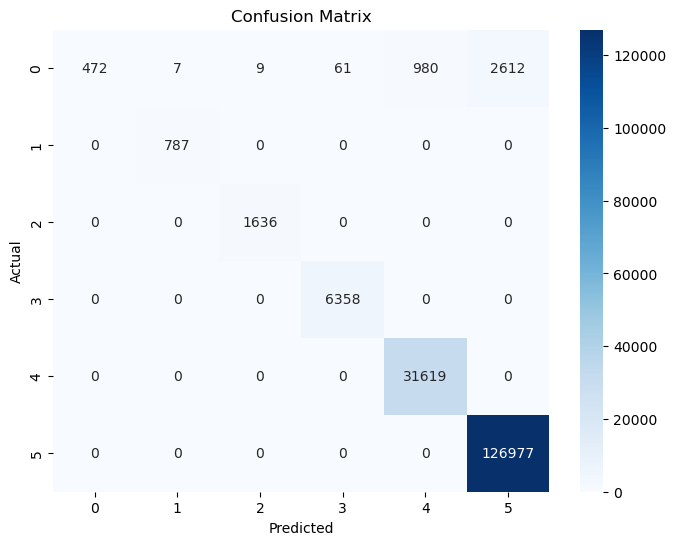

In [96]:
y_pred = [round(num) for num in y_pred]
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [97]:
np.sqrt(mean_squared_error(np.array(y_true), np.array(y_pred)))

0.6896292974951922